In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FixedLocator
import os.path as osp
import os
import cartopy.crs as ccrs
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point, LineString, Polygon
from shapely import geometry
from cartopy.feature import ShapelyFeature
import networkx as nx
import itertools as it
from PIL import ImageColor

### Define settings for plotting

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 12})

xspacing = FixedLocator([-10,-5, 0, 5, 10, 15, 20])
yspacing = FixedLocator([40, 45, 50, 55])

dpi = 200

c_radar_loc = '#A50026' #'#cc0000' #'#cc3300'
c_radar_area = '#347B98' #'#6EA6CD'
c_boundary = '#092834'
c_boundary_light = '#0a3142'
c_text = '#262626'
c_countries = 'lightgray'

In [3]:
root = '/home/fiona/birdMigration'
# root = '/media/fiona/Seagate Basic/PhD/paper_1/'
target_dir = osp.join(root, 'data/plots/final')

### Load all relevant data

In [4]:
root = '/home/fiona/birdMigration'
# root = '/media/fiona/Seagate Basic/PhD/paper_1/'
target_dir = osp.join(root, 'data/plots/final')
os.makedirs(target_dir, exist_ok=True)

voronoi = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=0/radar/fall/2015/voronoi.shp'))
voronoi = voronoi.to_crs(epsg=4326)

voronoi_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=15/radar/fall/2015/voronoi.shp'))
voronoi_b = voronoi_b.to_crs(epsg=4326)

delaunay_b = nx.read_gpickle(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=15/radar/fall/2015/delaunay.gpickle'))

radar_buffers = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=0/radar/fall/2015/radar_buffers.shp'))
radars = radar_buffers.centroid.to_crs(epsg=4326)
radar_buffers = radar_buffers.to_crs(epsg=4326)

radar_buffers_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=15/radar/fall/2015/radar_buffers.shp'))
radars_b = radar_buffers_b.centroid.to_crs(epsg=4326)

countries = gpd.read_file(osp.join(root, 'data/shapes/ne_10m_admin_0_countries_lakes.shp'))

extent = voronoi_b.total_bounds
extent[1] -= 0.5
crs = ccrs.AlbersEqualArea(central_longitude=voronoi.lon.mean(), central_latitude=voronoi.lat.mean())

/home/fiona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  from ipykernel import kernelapp as app
/home/fiona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



### Radar locations & VP range

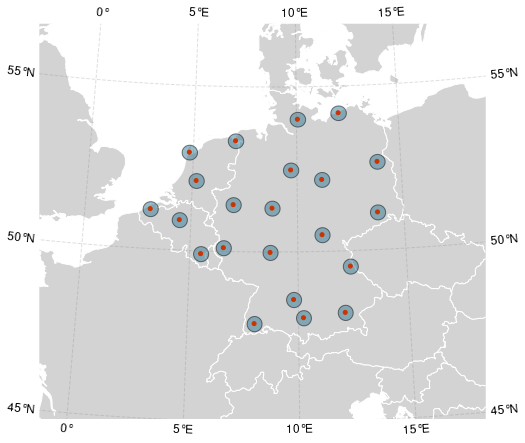

In [232]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw = {'projection' : crs})

f = ShapelyFeature(countries.geometry, ccrs.PlateCarree(), edgecolor='white')
ax.add_feature(f, facecolor=c_countries, zorder=0)
gplt.polyplot(radar_buffers, ax=ax, 
              facecolor=c_radar_area, alpha=0.5, extent=extent, zorder=1)
gplt.pointplot(radars, ax=ax, extent=extent, zorder=3, color=c_radar_loc, s=4)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='gray', alpha=0.25, linestyle='--')
gl.xlocator = xspacing
gl.ylocator = yspacing

fig.savefig(osp.join(target_dir, 'radar_locations.png'), bbox_inches='tight', dpi=dpi)

### Voronoi tessellation with boundary cells

In [214]:
voronoi_b.query('boundary == 1').index

Int64Index([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], dtype='int64')

In [4]:
all_radars = gpd.read_file(osp.join(root, 'data/raw/abm/all_radars.shp'))
all_radars = all_radars.query('radar != "frpla"')
all_radars.to_file(osp.join(root, 'data/raw/abm/all_radars.shp'))

In [11]:
minx, miny, maxx, maxy = voronoi_b.total_bounds
buffer_x, buffer_y = 4, 4
bounds = [maxy + buffer_y, minx - buffer_x, miny - buffer_y, maxx + buffer_x]
poly = Polygon([[bounds[0], bounds[1]], [bounds[0], bounds[3]], [bounds[2], bounds[3]], [bounds[2], bounds[1]]])

In [20]:
gdf = gpd.GeoDataFrame(geometry=[poly], crs='epsg:4326').to_crs(crs.proj4_init)
gdf.area * 1e-6

0    9.282763e+06
dtype: float64

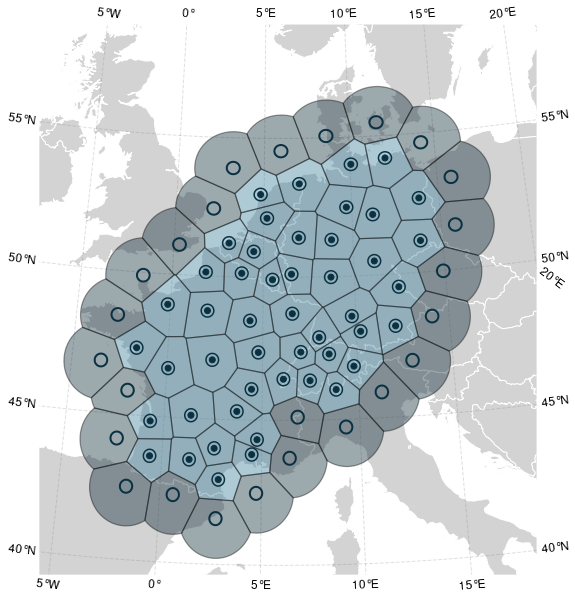

In [7]:
root = '/home/fiona/birdMigration'

voronoi_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=25/abm/fall/2015/voronoi.shp'))
#voronoi_b = gpd.read_file(osp.join(root, 'voronoi.shp'))
#voronoi_b = voronoi_b.to_crs(epsg=4326)

countries = gpd.read_file(osp.join(root, 'data/shapes/ne_10m_admin_0_countries_lakes.shp'))

extent = voronoi_b.total_bounds
extent[1] -= 1.0
extent[3] += 2.0
crs = ccrs.AlbersEqualArea(central_longitude=voronoi_b.lon.mean(), central_latitude=voronoi_b.lat.mean())

radar_buffers_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=25/abm/fall/2015/radar_buffers.shp'))
#radar_buffers_b = gpd.read_file(osp.join(root, 'radar_buffers.shp'))
radars_b = radar_buffers_b.to_crs(crs.proj4_init).centroid.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw = {'projection' : crs})

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='gray', alpha=0.25, linestyle='--')
gl.xlocator = xspacing
gl.ylocator = yspacing

f = ShapelyFeature(countries.geometry, ccrs.PlateCarree(), edgecolor='white')
ax.add_feature(f, facecolor=c_countries, zorder=0)
gplt.polyplot(voronoi_b.query('observed == 0'), ax=ax, facecolor=c_boundary, alpha=0.4, linewidth=1.2, extent=extent, zorder=2)
gplt.polyplot(voronoi_b.query('observed == 1'), ax=ax, facecolor=c_radar_area, alpha=0.4, linewidth=1.2, extent=extent, zorder=2)
a = gplt.polyplot(radar_buffers_b.query('observed == 1'), ax=ax, extent=extent, zorder=3, edgecolor=c_boundary_light, linewidth=1.5)
b = gplt.polyplot(radar_buffers_b.query('observed == 0'), ax=ax, extent=extent, zorder=3, edgecolor=c_boundary_light, linewidth=2)


gplt.pointplot(radars_b[voronoi_b.query('observed == 1').index], ax=ax, extent=extent, zorder=3, color=c_boundary_light, s=6)
#gplt.pointplot(radars_b[voronoi_b.query('boundary == 1').index], ax=ax, extent=extent, zorder=3, linewidth=1.5, facecolor='None', edgecolor=c_boundary_light, s=7)


fig.tight_layout()

fig.savefig(osp.join(target_dir, 'voronoi_tessellation_abm.png'), bbox_inches='tight', dpi=200)

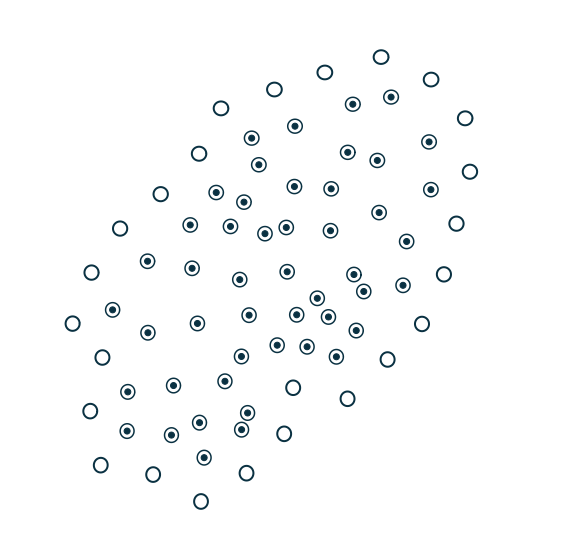

In [64]:
root = '/home/fiona/birdMigration'

#voronoi_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=30/abm/fall/2015/voronoi.shp'))
voronoi_b = gpd.read_file(osp.join(root, 'voronoi.shp'))
voronoi_b = voronoi_b.to_crs(epsg=4326)

countries = gpd.read_file(osp.join(root, 'data/shapes/ne_10m_admin_0_countries_lakes.shp'))

extent = voronoi_b.total_bounds
crs = ccrs.AlbersEqualArea(central_longitude=voronoi_b.lon.mean(), central_latitude=voronoi_b.lat.mean())

#radar_buffers_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=30/abm/fall/2015/radar_buffers.shp'))
radar_buffers_b = gpd.read_file(osp.join(root, 'radar_buffers.shp'))
radars_b = radar_buffers_b.to_crs(crs.proj4_init).centroid.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw = {'projection' : crs})
gplt.polyplot(radar_buffers_b.query('observed == 1'), ax=ax, extent=extent, zorder=3, edgecolor=c_boundary_light, linewidth=1.5)
gplt.polyplot(radar_buffers_b.query('observed == 0'), ax=ax, extent=extent, zorder=3, edgecolor=c_boundary_light, linewidth=2)
gplt.pointplot(radars_b[voronoi_b.query('observed == 1').index], ax=ax, extent=extent, zorder=3, color=c_boundary_light, s=6)

fig.tight_layout()

fig.savefig(osp.join(target_dir, 'radar_icons.png'), bbox_inches='tight', dpi=500)

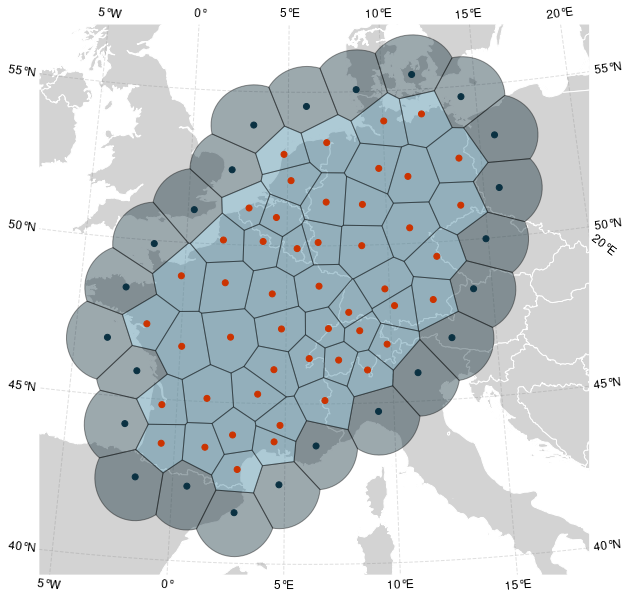

In [9]:
root = '/home/fiona/birdMigration'

#voronoi_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=30/abm/fall/2015/voronoi.shp'))
voronoi_b = gpd.read_file(osp.join(root, 'voronoi.shp'))
voronoi_b = voronoi_b.to_crs(epsg=4326)

countries = gpd.read_file(osp.join(root, 'data/shapes/ne_10m_admin_0_countries_lakes.shp'))

extent = voronoi_b.total_bounds
extent[1] -= 1.0
crs = ccrs.AlbersEqualArea(central_longitude=voronoi_b.lon.mean(), central_latitude=voronoi_b.lat.mean())

#radar_buffers_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=30/abm/fall/2015/radar_buffers.shp'))
radar_buffers_b = gpd.read_file(osp.join(root, 'radar_buffers.shp'))
radars_b = radar_buffers_b.to_crs(crs.proj4_init).centroid.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw = {'projection' : crs})

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='gray', alpha=0.25, linestyle='--')
gl.xlocator = xspacing
gl.ylocator = yspacing

f = ShapelyFeature(countries.geometry, ccrs.PlateCarree(), edgecolor='white')
ax.add_feature(f, facecolor=c_countries, zorder=0)
gplt.polyplot(voronoi_b.query('boundary == 1'), ax=ax, facecolor=c_boundary, alpha=0.4, extent=extent, zorder=2)
gplt.polyplot(voronoi_b.query('boundary == 0'), ax=ax, facecolor=c_radar_area, alpha=0.4, extent=extent, zorder=2)
gplt.pointplot(radars_b[voronoi_b.query('boundary == 0').index], ax=ax, extent=extent, zorder=3, color=c_radar_loc, s=6)
gplt.pointplot(radars_b[voronoi_b.query('boundary == 1').index], ax=ax, extent=extent, zorder=3, color=c_boundary_light, s=6)

fig.tight_layout()

fig.savefig(osp.join(target_dir, 'voronoi_tessellation_abm.png'), bbox_inches='tight', dpi=200)

In [ ]:
min_distances = {}
for u, v, d in G.edges(data=True):
    if not 'boundary' in G.nodes[u]['radar'] and not 'boundary' in G.nodes[v]['radar']:
        if not u in min_distances:
            min_distances[u] = d['distance']
        elif d['distance'] < min_distances[u]:
            min_distances[u] = d['distance']
min_distances = [d / 1000 for d in min_distances.values()]

print(f'minimum = {min(min_distances)}')
print(f'maximum = {max(min_distances)}')
print(f'mean = {np.mean(min_distances)}')
print(f'median = {np.median(min_distances)}')

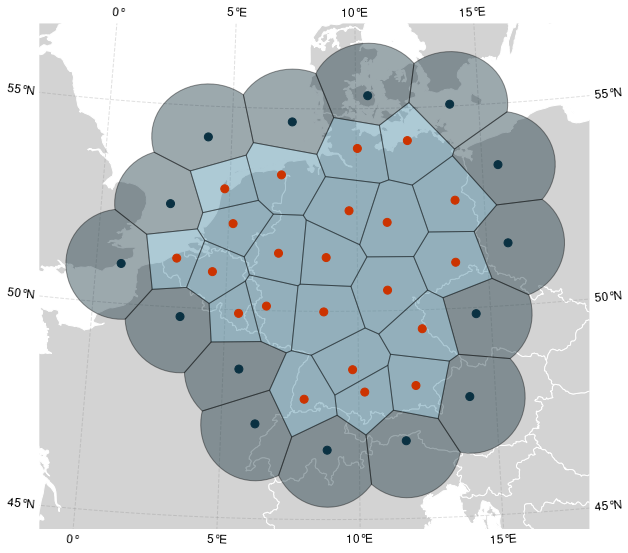

In [36]:
voronoi_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=15/radar/fall/2015/voronoi.shp'))
voronoi_b = voronoi_b.to_crs(epsg=4326)

countries = gpd.read_file(osp.join(root, 'data/shapes/ne_10m_admin_0_countries_lakes.shp'))

extent = voronoi_b.total_bounds
extent[1] -= 0.8
extent[3] += 0.2
crs = ccrs.AlbersEqualArea(central_longitude=voronoi_b.lon.mean(), central_latitude=voronoi_b.lat.mean())

radar_buffers_b = gpd.read_file(osp.join(root, 'data/preprocessed/1H_voronoi_ndummy=15/radar/fall/2015/radar_buffers.shp'))
radars_b = radar_buffers_b.to_crs(crs.proj4_init).centroid.to_crs(epsg=4326)


fig, ax = plt.subplots(figsize=(8,8), subplot_kw = {'projection' : crs})

f = ShapelyFeature(countries.geometry, ccrs.PlateCarree(), edgecolor='white')
ax.add_feature(f, facecolor=c_countries, zorder=0)
gplt.polyplot(voronoi_b.query('boundary == 1'), ax=ax, facecolor=c_boundary, alpha=0.4, extent=extent, zorder=2)
gplt.polyplot(voronoi_b.query('boundary == 0'), ax=ax, facecolor=c_radar_area, alpha=0.4, extent=extent, zorder=2)
gplt.pointplot(radars_b[voronoi_b.query('boundary == 0').index], ax=ax, extent=extent, zorder=3, color=c_radar_loc, s=8)
gplt.pointplot(radars_b[voronoi_b.query('boundary == 1').index], ax=ax, extent=extent, zorder=3, color=c_boundary_light, s=8)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='gray', alpha=0.25, linestyle='--')
gl.xlocator = xspacing
gl.ylocator = yspacing

fig.tight_layout()

fig.savefig(osp.join(target_dir, 'voronoi_tessellation_radar.png'), bbox_inches='tight', dpi=200)

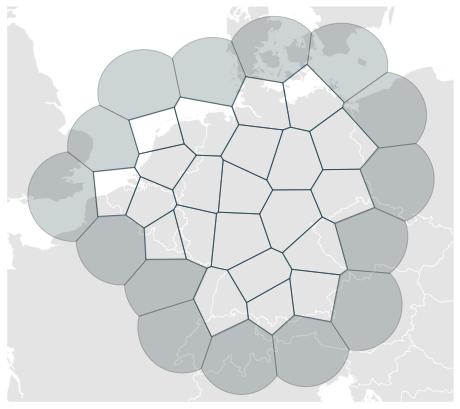

In [250]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw = {'projection' : crs})

f = ShapelyFeature(countries.geometry, ccrs.PlateCarree(), edgecolor='white')
ax.add_feature(f, facecolor=c_countries, zorder=0, alpha=0.6)
gplt.polyplot(voronoi_b.query('boundary == 1'), ax=ax, facecolor=c_boundary, alpha=0.2, extent=extent, zorder=2)
gplt.polyplot(voronoi_b.query('boundary == 0'), ax=ax, edgecolor=c_boundary_light, alpha=0.6, extent=extent, zorder=2)

fig.savefig(osp.join(target_dir, 'voronoi_tessellation_background.png'), bbox_inches='tight', dpi=dpi)

### Voronoi cells with radar names

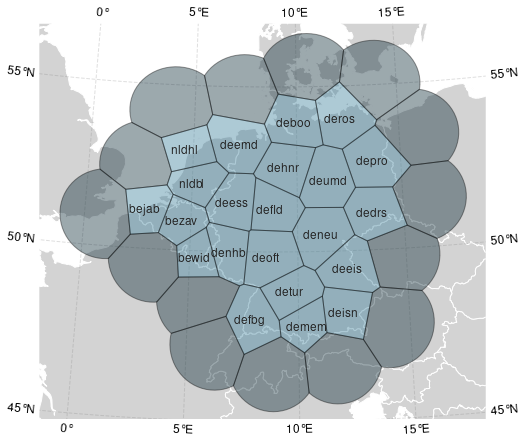

In [158]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw = {'projection' : crs})

f = ShapelyFeature(countries.geometry, ccrs.PlateCarree(), edgecolor='white')
ax.add_feature(f, facecolor=c_countries, zorder=0)

gplt.polyplot(voronoi_b.query('boundary == 1'), ax=ax, facecolor=c_boundary, alpha=0.4, extent=extent, zorder=2)
gplt.polyplot(voronoi_b.query('boundary == 0'), ax=ax, facecolor=c_radar_area, alpha=0.4, extent=extent, zorder=2)

centroids = voronoi_b.to_crs(crs.proj4_init).centroid
for x, y, label in zip(centroids.geometry.x, centroids.geometry.y, voronoi.radar):
    if not 'boundary' in label:
        ax.annotate(label, xy=(x, y), xytext=(-18, -5), textcoords="offset points", fontsize=12, color=c_text)
        
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='gray', alpha=0.25, linestyle='--')
gl.xlocator = xspacing
gl.ylocator = yspacing
        
fig.savefig(osp.join(target_dir, 'voronoi_with_names.png'), bbox_inches='tight', dpi=dpi)

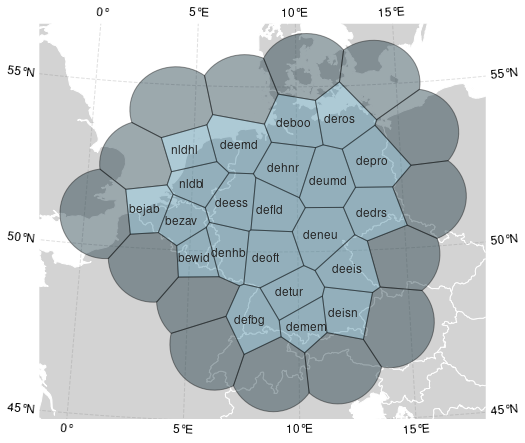

In [5]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw = {'projection' : crs})

f = ShapelyFeature(countries.geometry, ccrs.PlateCarree(), edgecolor='white')
ax.add_feature(f, facecolor=c_countries, zorder=0)

gplt.polyplot(voronoi_b.query('boundary == 1'), ax=ax, facecolor=c_boundary, alpha=0.4, extent=extent, zorder=2)
gplt.polyplot(voronoi_b.query('boundary == 0'), ax=ax, facecolor=c_radar_area, alpha=0.4, extent=extent, zorder=2)

centroids = voronoi_b.to_crs(crs.proj4_init).centroid
for x, y, label in zip(centroids.geometry.x, centroids.geometry.y, voronoi.radar):
    if not 'boundary' in label:
        ax.annotate(label, xy=(x, y), xytext=(-18, -5), textcoords="offset points", fontsize=12, color=c_text)
        
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='gray', alpha=0.25, linestyle='--')
gl.xlocator = xspacing
gl.ylocator = yspacing
        
fig.savefig(osp.join(target_dir, 'voronoi_with_names.png'), bbox_inches='tight', dpi=dpi)

### Delaunay triangulation

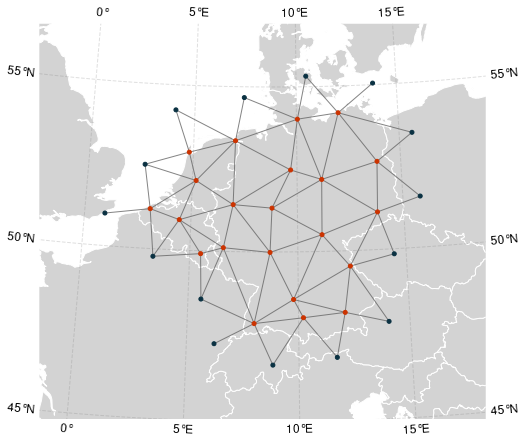

In [229]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw = {'projection' : crs})

f = ShapelyFeature(countries.geometry, ccrs.PlateCarree(), edgecolor='white')
ax.add_feature(f, facecolor=c_countries, zorder=0)

G = delaunay_b.to_undirected()
boundary_edges = [(u[0], v[0]) for u, v in it.combinations(list(G.nodes(data=True)), 2) if u[1]['boundary'] and v[1]['boundary']]
G.remove_edges_from(boundary_edges)

coord_df = gpd.GeoDataFrame(dict(radar = voronoi_b.radar, 
                             geometry = [geometry.Point((row.lon, row.lat)) for i, row in voronoi_b.iterrows()]), 
                            crs='epsg:4326').to_crs(crs.proj4_init)
pos = {ridx: (coord_df.query(f'radar == "{name}"').geometry.iloc[0].x, coord_df.query(f'radar == "{name}"').geometry.iloc[0].y) for 
       (ridx, name) in nx.get_node_attributes(delaunay_b, 'radar').items()}

node_colors = [c_boundary_light if 'boundary' in n_data['radar'] 
               else c_radar_loc for n, n_data in delaunay_b.nodes(data=True)]

nx.draw(G, pos=pos, with_labels=False, node_size=1, width=1, ax=ax, 
        edge_color=(.4, .4, .4, .8))

gplt.pointplot(radars, ax=ax, extent=extent, zorder=3, color=c_radar_loc, s=4)
gplt.pointplot(radars_b[voronoi_b.query('boundary == 1').index], ax=ax, extent=extent, zorder=3, color=c_boundary_light, s=4)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='gray', alpha=0.25, linestyle='--')
gl.xlocator = xspacing
gl.ylocator = yspacing

fig.savefig(osp.join(target_dir, 'delaunay_triangulation.png'), bbox_inches='tight', dpi=dpi)